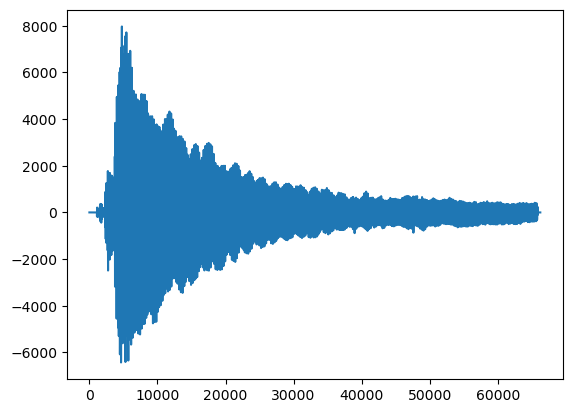

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

from scipy.integrate import quad
sample_rate, data= wavfile.read('chord.wav')

sound = 0.5*(data[:,0]+data[:,1]) # average the left and right channels

plt.plot(sound)

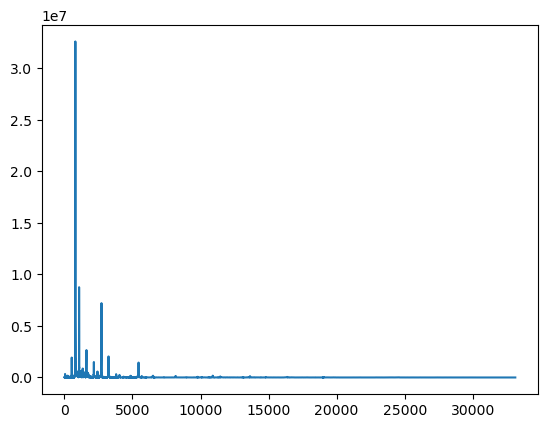

In [27]:
sound_f = np.fft.rfft(sound)
plt.plot(np.abs(sound_f))
sound_f[0:10]

amplitudes= np.abs(sound_f)

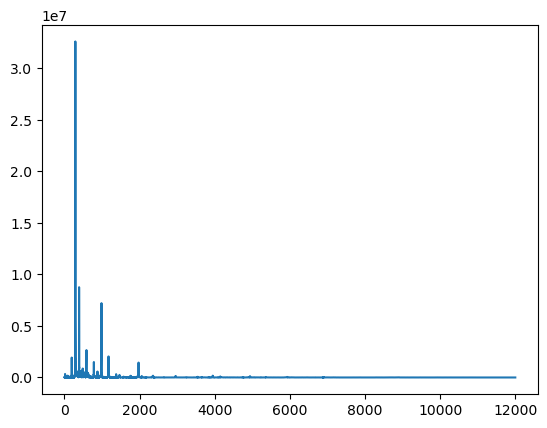

In [28]:
frequencies = np.fft.rfftfreq(len(sound), d=1/sample_rate)
plt.plot(frequencies, amplitudes)

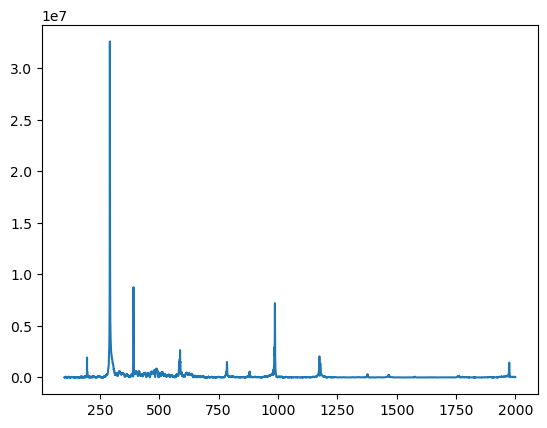

In [43]:
# focus in on the most interesting part of the spectrum:
window=(frequencies<2000)*(frequencies>100)
plt.plot(frequencies[window], np.abs(sound_f[window]))

In [46]:
# list the 10 most prominent frequencies
for i in np.argsort(amplitudes)[:-10:-1]:
    print(frequencies[i])

291.6666666666667
291.304347826087
292.02898550724643
292.3913043478261
290.9420289855073
292.75362318840587
391.304347826087
986.9565217391306
290.57971014492756


In [47]:
from librosa import hz_to_note, note_to_hz
for i in np.argsort(amplitudes)[:-10:-1]:
    print(hz_to_note(frequencies[i]))

D4
D4
D4
D4
D4
D4
G4
B5
D4


In [48]:
# map amplitudes to notes and sum up frequencies that correspond to the same note

notes = {} #  dictionary to store the amplitudes of each note

for (i,f) in enumerate(frequencies):
   
    if i==0: continue # frequency 0 is not a note
    else:  
        note = hz_to_note(f)
        if note in notes:
            notes[note]+=amplitudes[i] # add the amplitude
        else:
            notes[note] = amplitudes[i] # note not in dictionary yet, so add it

In [49]:
# find the most prominent notes
most_prominent_notes = sorted(notes, key=notes.get, reverse=True)
for i in range(10):
    print(most_prominent_notes[i], notes[most_prominent_notes[i]])



D4 214941052.4013601
B5 72179262.36620702
D5 46279527.24307449
D6 37012032.58257114
G4 34537322.23409464
D♯4 32801476.60173194
B4 31483133.6563529
A♯4 29717186.390462007
D♯5 29656256.21959821
B6 28841776.71175841


['D4', 'B5', 'D5', 'D6', 'G4', 'D♯4', 'B4', 'A♯4', 'D♯5', 'B6']

In [67]:
# autotune: delete everything that is not a note in the G major chord
G_chord = ['G', 'B','D']
sounds_f_tuned = np.zeros(len(sound_f), dtype=np.complex128)
sounds_f_tuned[0] = sound_f[0] # keep the DC component
for i in range(1,len(frequencies)):
    note = hz_to_note(frequencies[i], octave=False)
    if note[0] in G_chord:
        sounds_f_tuned[i] = sound_f[i]


# transform back to time domain
sound_tuned = np.fft.irfft(sounds_f_tuned)

sound_untuned=sound-sound_tuned
    


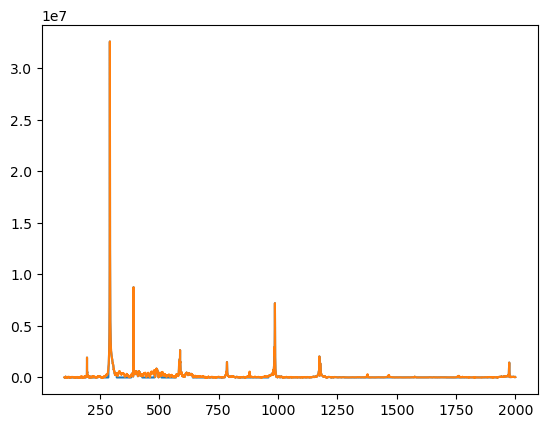

In [68]:
plt.plot(frequencies[window], np.abs(sounds_f_tuned[window]), frequencies[window], np.abs(sound_f[window]))

In [69]:
wavfile.write('chord_tuned.wav', sample_rate, sound_tuned.astype(np.int16))
wavfile.write('chord_untuned.wav', sample_rate, sound_untuned.astype(np.int16))